In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [30]:
Aquifer_Auser = pd.read_csv('./datasets/Aquifer_Auser.csv')

In [31]:
Aquifer_Auser

,Date,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
0,05/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0,10.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,07/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.20,0.0,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.40,0.0,13.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.40,0.0,12.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8149,26/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.75,0.0,23.75,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.20,-1.03
8150,27/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.35,0.0,24.30,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.21,-1.03
8151,28/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.75,0.0,24.55,-6829.936207,-7455.505,-8724.261667,-5809.63,-3000.1,0.23,-1.03
8152,29/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.90,0.0,23.60,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.23,-1.02


In [32]:
Aquifer_Auser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     8154 non-null   object 
 1   Rainfall_Gallicano                       5295 non-null   float64
 2   Rainfall_Pontetetto                      5295 non-null   float64
 3   Rainfall_Monte_Serra                     5289 non-null   float64
 4   Rainfall_Orentano                        5295 non-null   float64
 5   Rainfall_Borgo_a_Mozzano                 5295 non-null   float64
 6   Rainfall_Piaggione                       4930 non-null   float64
 7   Rainfall_Calavorno                       5295 non-null   float64
 8   Rainfall_Croce_Arcana                    5295 non-null   float64
 9   Rainfall_Tereglio_Coreglia_Antelminelli  5295 non-null   float64
 10  Rainfall_Fabbriche_di_Vallico            5295 no

In [33]:
Aquifer_Auser.shape

(8154, 27)

### Filled Entries

<AxesSubplot:>

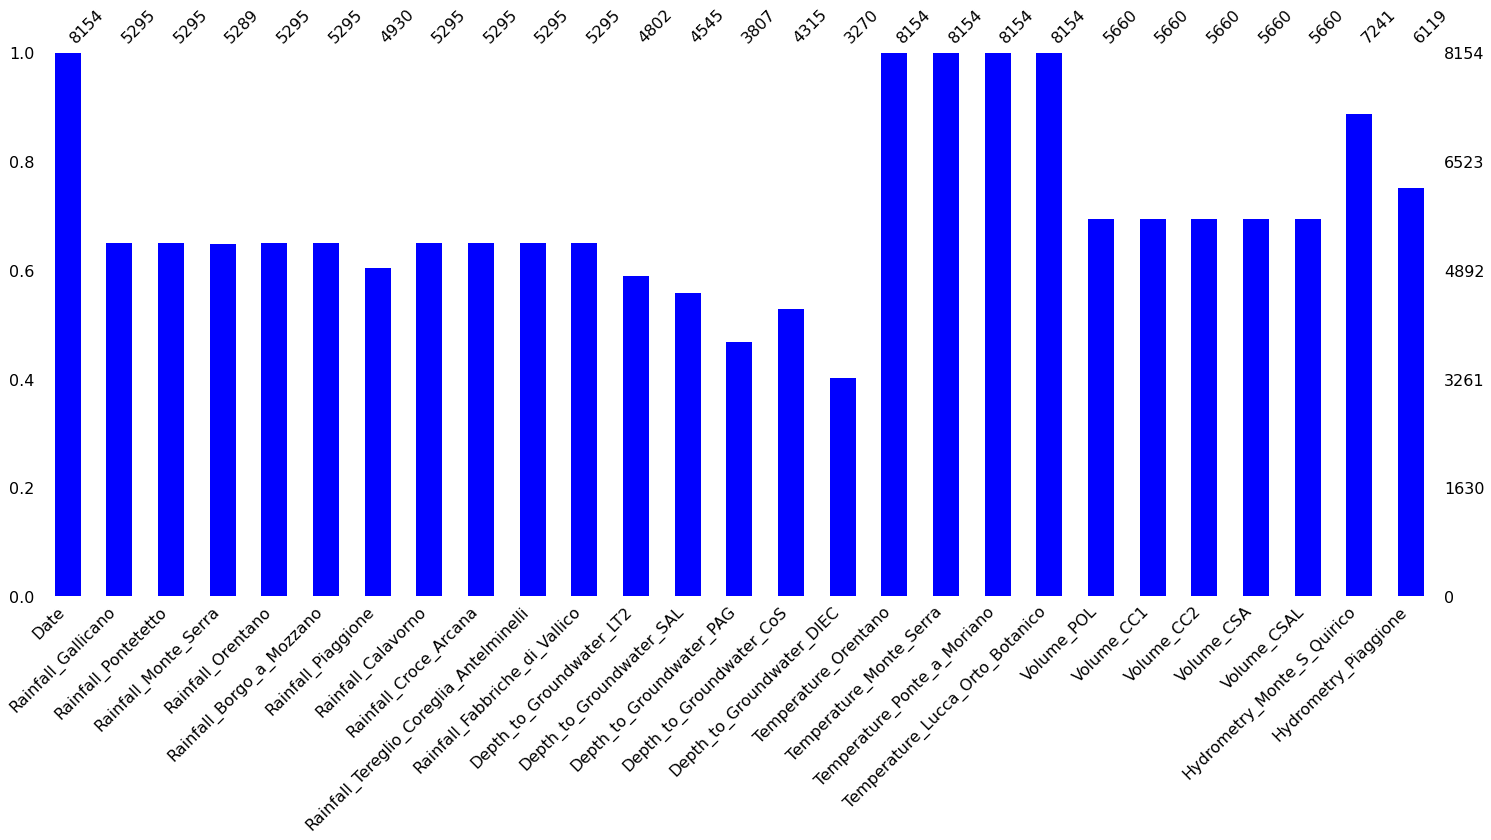

In [34]:
msno.bar(Aquifer_Auser,color='b')

### Dates starting and ending values

In [35]:
print('starting date:', Aquifer_Auser.Date.values[[0,-1]][0])
print('ending date:', Aquifer_Auser.Date.values[[0,-1]][1])


starting date: 05/03/1998
ending date: 30/06/2020


### Position of Null values

<AxesSubplot:>

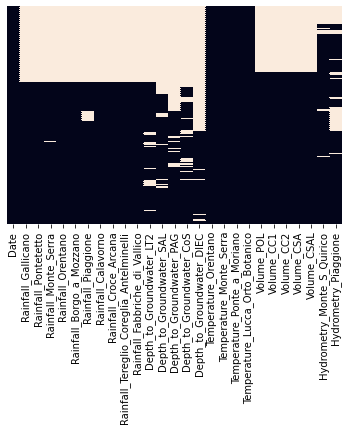

In [36]:
sns.heatmap(Aquifer_Auser.isnull(),yticklabels=False,cbar=False)

In [37]:
Aquifer_Auser.drop(Aquifer_Auser.index[0:2860], inplace=True)

<AxesSubplot:>

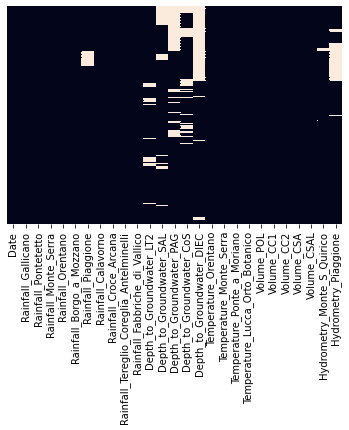

In [38]:
sns.heatmap(Aquifer_Auser.isnull(),yticklabels=False,cbar=False)

In [39]:
data=Aquifer_Auser.copy()
data.drop('Date',axis=1,inplace=True)

### Feature Selection

<AxesSubplot:>

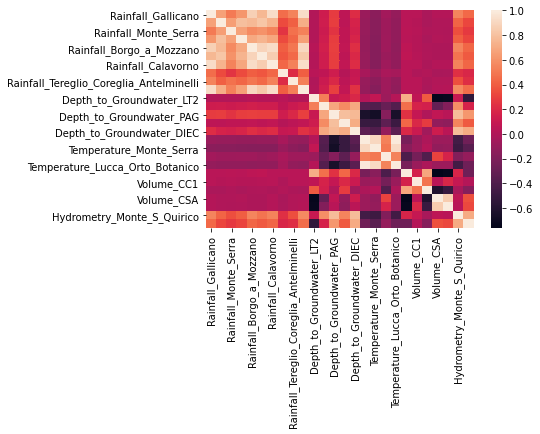

In [40]:
sns.heatmap(data.corr())

In [41]:
features_nan=[features for features in Aquifer_Auser.columns if Aquifer_Auser[features].isnull().sum()>1 and Aquifer_Auser[features].dtypes!='O']
for feature in features_nan:
    print(feature, np.round(Aquifer_Auser[feature].isnull().mean()*100,4),'% missing ')

Rainfall_Monte_Serra 0.1133 % missing 
Rainfall_Piaggione 6.8946 % missing 
Depth_to_Groundwater_LT2 9.3124 % missing 
Depth_to_Groundwater_SAL 14.1481 % missing 
Depth_to_Groundwater_PAG 28.0884 % missing 
Depth_to_Groundwater_CoS 18.4926 % missing 
Depth_to_Groundwater_DIEC 38.232 % missing 
Hydrometry_Monte_S_Quirico 1.7189 % missing 
Hydrometry_Piaggione 19.1915 % missing 


In [42]:
'''
Columns that are going to be dropped


'''

"\nColumns that are going to be dropped\n\n'Date',\n'Hydrometry_Nave_di_Rosano', # Target Variable\n'Rainfall_S_Savino',\n'Rainfall_Consuma',\n'Rainfall_Laterina',\n'Rainfall_Camaldoli',\n'Rainfall_Stia',\n'',\n'Rainfall_Montevarchi',\n'Rainfall_Bibbiena',\n'Rainfall_Incisa'\n\n"

In [44]:
a = Aquifer_Auser

features_nan=[features for features in a.columns if a[features].isnull().sum()>1 and a[features].dtypes!='O']
for feature in features_nan:
    print(feature, np.round(a[feature].isnull().mean()*100,4),'% missing ')

Rainfall_Monte_Serra 0.1133 % missing 
Rainfall_Piaggione 6.8946 % missing 
Depth_to_Groundwater_LT2 9.3124 % missing 
Depth_to_Groundwater_SAL 14.1481 % missing 
Depth_to_Groundwater_PAG 28.0884 % missing 
Depth_to_Groundwater_CoS 18.4926 % missing 
Depth_to_Groundwater_DIEC 38.232 % missing 
Hydrometry_Monte_S_Quirico 1.7189 % missing 
Hydrometry_Piaggione 19.1915 % missing 


### Imputation

### 1. Method (Determining which value to input)

- Rainfall_Monte_Serra

In [50]:
a['Rainfall_Monte_Serra'].describe()

count    5288.000000
mean        3.915772
std        10.813620
min         0.000000
25%         0.000000
50%         0.000000
75%         1.600000
max       152.200000
Name: Rainfall_Monte_Serra, dtype: float64

(array([3.963e+03, 2.430e+02, 1.280e+02, 1.250e+02, 1.020e+02, 6.700e+01,
        6.800e+01, 3.900e+01, 5.100e+01, 3.500e+01, 4.300e+01, 3.300e+01,
        2.700e+01, 4.300e+01, 2.700e+01, 2.000e+01, 4.000e+01, 1.500e+01,
        2.300e+01, 1.800e+01, 1.400e+01, 1.500e+01, 1.200e+01, 9.000e+00,
        1.100e+01, 6.000e+00, 1.500e+01, 6.000e+00, 2.000e+00, 8.000e+00,
        6.000e+00, 1.000e+01, 7.000e+00, 4.000e+00, 7.000e+00, 3.000e+00,
        6.000e+00, 4.000e+00, 1.000e+00, 5.000e+00, 2.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+0

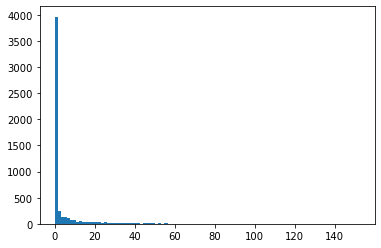

In [59]:
data_22 = a['Rainfall_Monte_Serra']
plt.hist(data_22,bins=100)


In [61]:
data_22.value_counts().unique

<bound method Series.unique of 0.0     3146
0.2      365
0.4      148
0.8       91
0.6       81
        ... 
35.6       1
49.4       1
69.2       1
55.6       1
54.0       1
Name: Rainfall_Monte_Serra, Length: 265, dtype: int64>

In [ ]:
# MEAN IS BEST FOR Rainfall_Monte_Serra

- Rainfall_Piaggione